In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('Dallas data summary lag 12.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,3/1/2005,121.52173,5.93,37170,5816.407,5.3,284456.508,1254.0813,43.20%,133706,2.30%,4281,4.19,188.9
1,4/1/2005,122.39961,5.86,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134186,2.30%,5548,4.69,196.6
2,5/1/2005,123.28627,5.72,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134186,2.30%,4878,4.58,196.6
3,6/1/2005,124.49855,5.58,39903,5999.411,5.4,307562.122,1254.0813,43.40%,134186,2.30%,5304,4.83,196.6
4,7/1/2005,125.36724,5.70,39903,5999.411,5.4,307562.122,1254.0813,43.40%,134032,2.30%,5140,5.06,196.6
5,8/1/2005,125.70066,5.82,39903,5999.411,5.2,307562.122,1254.0813,43.40%,134032,2.30%,6042,4.36,196.6
6,9/1/2005,125.18592,5.77,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134032,2.30%,4361,4.39,196.6
7,10/1/2005,124.58129,6.07,39903,5999.411,4.8,307562.122,1254.0813,43.20%,134539,2.50%,4814,4.45,196.6
8,11/1/2005,123.85171,6.33,39903,5999.411,5.0,307562.122,1254.0813,43.20%,134539,2.50%,4713,4.34,196.6
9,12/1/2005,123.66966,6.27,39903,5999.411,4.8,307562.122,1254.0813,43.20%,134539,2.50%,5458,4.32,196.6


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,121.52173,5.93,37170,5816.407,5.3,284456.508,1254.0813,133706,4281,4.19,188.9,43.2,2.3
1,4/1/2005,122.39961,5.86,39903,5999.411,5.1,307562.122,1254.0813,134186,5548,4.69,196.6,43.4,2.3
2,5/1/2005,123.28627,5.72,39903,5999.411,5.1,307562.122,1254.0813,134186,4878,4.58,196.6,43.4,2.3
3,6/1/2005,124.49855,5.58,39903,5999.411,5.4,307562.122,1254.0813,134186,5304,4.83,196.6,43.4,2.3
4,7/1/2005,125.36724,5.70,39903,5999.411,5.4,307562.122,1254.0813,134032,5140,5.06,196.6,43.4,2.3


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,37170,5816.407,5.3,284456.508,1254.0813,133706,4281,4.19,188.900,43.2,2.3
1,5.86,39903,5999.411,5.1,307562.122,1254.0813,134186,5548,4.69,196.600,43.4,2.3
2,5.72,39903,5999.411,5.1,307562.122,1254.0813,134186,4878,4.58,196.600,43.4,2.3
3,5.58,39903,5999.411,5.4,307562.122,1254.0813,134186,5304,4.83,196.600,43.4,2.3
4,5.70,39903,5999.411,5.4,307562.122,1254.0813,134032,5140,5.06,196.600,43.4,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...
137,3.44,53870,7337.097,4.1,1699894.281,762.4122,134870,5175,3.96,221.248,35.2,1.5
138,3.46,53870,7337.097,4.1,1699894.281,762.4122,134870,3660,4.03,221.248,35.2,1.5
139,3.47,53870,7337.097,3.9,1699894.281,762.4122,136846,4608,3.92,221.248,35.1,1.5
140,3.77,53870,7337.097,3.7,1699894.281,762.4122,136846,4908,3.94,221.248,35.1,1.5


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),142.0,4.834930,1.054379,3.3500,3.92500,4.5550,5.9275,6.760000e+00
Personal_Income,142.0,45779.647887,4672.648597,37170.0000,41319.00000,45766.0000,49866.0000,5.387000e+04
Resident_Population,142.0,6637.469070,397.094078,5816.4070,6392.06500,6577.5515,6889.7690,7.337097e+03
Unemployment_Rate,142.0,5.676056,1.516759,3.6000,4.30000,5.2500,6.8750,8.700000e+00
GDP,142.0,472736.923148,359706.280467,284456.5080,336217.27000,364866.3080,415238.9620,1.699894e+06
Crime_Rate,142.0,832.365410,205.274837,663.7371,676.49755,701.0388,894.8343,1.254081e+03
Median_Debt,142.0,132918.838028,3271.554439,127063.0000,129983.50000,134186.0000,135901.7500,1.374710e+05
New_Structures,142.0,3241.169014,1313.599354,1098.0000,2082.25000,3234.0000,4216.5000,7.374000e+03
Economic_Conditions_Index,142.0,3.277394,2.169456,-4.4600,3.46500,4.0350,4.4500,5.220000e+00
CPI all items less shelter,142.0,214.333915,9.248652,188.9000,209.40700,218.9020,221.2210,2.247800e+02


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.038593,-1.842563,-2.067676,-0.247934,-0.523428,2.054396,0.240608,0.791589,0.420661,-2.750013,0.833694,-0.714379
1,0.972203,-1.257670,-1.606818,-0.379794,-0.459194,2.054396,0.387327,1.756115,0.651134,-1.917459,0.903168,-0.714379
2,0.839424,-1.257670,-1.606818,-0.379794,-0.459194,2.054396,0.387327,1.246066,0.600430,-1.917459,0.903168,-0.714379
3,0.706644,-1.257670,-1.606818,-0.182004,-0.459194,2.054396,0.387327,1.570365,0.715666,-1.917459,0.903168,-0.714379
4,0.820455,-1.257670,-1.606818,-0.182004,-0.459194,2.054396,0.340255,1.445518,0.821683,-1.917459,0.903168,-0.714379
...,...,...,...,...,...,...,...,...,...,...,...,...
137,-1.322987,1.731427,1.761869,-1.039095,3.411554,-0.340778,0.596402,1.472162,0.314644,0.747578,-1.945285,-1.581402
138,-1.304019,1.731427,1.761869,-1.039095,3.411554,-0.340778,0.596402,0.318842,0.346910,0.747578,-1.945285,-1.581402
139,-1.294534,1.731427,1.761869,-1.170955,3.411554,-0.340778,1.200396,1.040523,0.296206,0.747578,-1.980022,-1.581402
140,-1.010007,1.731427,1.761869,-1.302815,3.411554,-0.340778,1.200396,1.268904,0.305425,0.747578,-1.980022,-1.581402


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

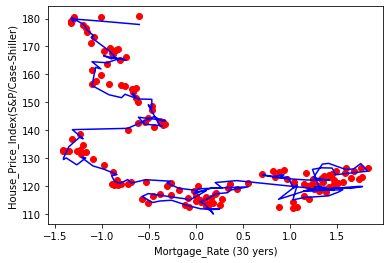

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 2.05
Accuracy: 98.4 %.


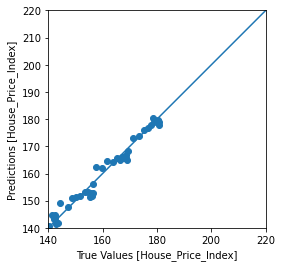

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9843727975867388

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,-1.879367
1,1.459418
2,13.692237
3,2.805470
4,-0.265346
5,8.602382
6,0.505010
7,0.832504
8,-1.892713
9,-3.183245


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[119.27541403 123.21891047 123.13980237 123.99611008 123.45384855
 124.05238122 122.86501851 122.1824748  122.12092857 122.34754358
 122.99760873 127.86295844 128.1360868  125.96795777 126.12333869
 128.05421813 125.33998888 124.51382625 124.0543011  126.4527076
 126.54454095 125.98249582 119.10537833 119.59031575 119.78390663
 118.73191168 118.93880263 119.89307761 119.83179705 119.18681505
 119.40803353 118.4607401  118.79905628 118.72147857 115.25793271
 119.21537688 120.46613408 115.05229823 115.86390448 116.499842
 117.83946371 118.6917874  118.26619127 118.48849137 119.33097875
 121.95764306 121.26294541 119.21195556 119.24917578 117.20351519
 119.01386768 119.72160511 118.5845299  117.63420052 117.22367235
 115.17383886 114.38500449 113.65503801 109.99584582 111.85270084
 111.56724142 111.73008569 111.8447315  113.04770634 114.93163084
 114.6510378  114.10721352 116.28262472 117.30758024 115.45175514
 114.90860639 118.32386785 118.0102536  118.43378825 119.2406671
 121.17037121 

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,119.275414
1,123.218910
2,123.139802
3,123.996110
4,123.453849
...,...
137,179.876786
138,178.819923
139,179.808316
140,179.076333


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
Mortgage_Rate (30 yers),1.038593,0.972203,0.839424,0.706644,0.820455,0.934266,0.886845,1.171373,1.417963,1.361058,...,-1.085881,-1.161755,-1.171239,-1.199692,-1.322987,-1.322987,-1.304019,-1.294534,-1.010007,-0.602184
Personal_Income,-1.842563,-1.257670,-1.257670,-1.257670,-1.257670,-1.257670,-1.257670,-1.257670,-1.257670,-1.257670,...,1.731427,1.731427,1.731427,1.731427,1.731427,1.731427,1.731427,1.731427,1.731427,1.731427
Resident_Population,-2.067676,-1.606818,-1.606818,-1.606818,-1.606818,-1.606818,-1.606818,-1.606818,-1.606818,-1.606818,...,1.761869,1.761869,1.761869,1.761869,1.761869,1.761869,1.761869,1.761869,1.761869,1.761869
Unemployment_Rate,-0.247934,-0.379794,-0.379794,-0.182004,-0.182004,-0.313864,-0.379794,-0.577584,-0.445724,-0.577584,...,-1.236885,-1.368745,-1.368745,-1.039095,-0.973165,-1.039095,-1.039095,-1.170955,-1.302815,-1.302815
GDP,-0.523428,-0.459194,-0.459194,-0.459194,-0.459194,-0.459194,-0.459194,-0.459194,-0.459194,-0.459194,...,3.411554,3.411554,3.411554,3.411554,3.411554,3.411554,3.411554,3.411554,3.411554,3.411554
Crime_Rate,2.054396,2.054396,2.054396,2.054396,2.054396,2.054396,2.054396,2.054396,2.054396,2.054396,...,-0.340778,-0.340778,-0.340778,-0.340778,-0.340778,-0.340778,-0.340778,-0.340778,-0.340778,-0.340778
Median_Debt,0.240608,0.387327,0.387327,0.387327,0.340255,0.340255,0.340255,0.495227,0.495227,0.495227,...,0.396191,0.319470,0.319470,0.319470,0.596402,0.596402,0.596402,1.200396,1.200396,1.200396
New_Structures,0.791589,1.756115,1.246066,1.570365,1.445518,2.132181,0.852491,1.197345,1.120457,1.687601,...,0.598989,0.598989,1.104470,1.287174,1.771340,1.472162,0.318842,1.040523,1.268904,0.747436
Economic_Conditions_Index,0.420661,0.651134,0.600430,0.715666,0.821683,0.499022,0.512850,0.540507,0.489803,0.480584,...,0.222455,0.254721,0.070343,0.047296,0.291596,0.314644,0.346910,0.296206,0.305425,0.310034
CPI all items less shelter,-2.750013,-1.917459,-1.917459,-1.917459,-1.917459,-1.917459,-1.917459,-1.917459,-1.917459,-1.917459,...,0.747578,0.747578,0.747578,0.747578,0.747578,0.747578,0.747578,0.747578,0.747578,0.747578


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,132,133,134,135,136,137,138,139,140,141
0,Mortgage_Rate (30 yers),1.038593,0.972203,0.839424,0.706644,0.820455,0.934266,0.886845,1.171373,1.417963,...,-1.085881,-1.161755,-1.171239,-1.199692,-1.322987,-1.322987,-1.304019,-1.294534,-1.010007,-0.602184
1,Personal_Income,-1.842563,-1.257670,-1.257670,-1.257670,-1.257670,-1.257670,-1.257670,-1.257670,-1.257670,...,1.731427,1.731427,1.731427,1.731427,1.731427,1.731427,1.731427,1.731427,1.731427,1.731427
2,Resident_Population,-2.067676,-1.606818,-1.606818,-1.606818,-1.606818,-1.606818,-1.606818,-1.606818,-1.606818,...,1.761869,1.761869,1.761869,1.761869,1.761869,1.761869,1.761869,1.761869,1.761869,1.761869
3,Unemployment_Rate,-0.247934,-0.379794,-0.379794,-0.182004,-0.182004,-0.313864,-0.379794,-0.577584,-0.445724,...,-1.236885,-1.368745,-1.368745,-1.039095,-0.973165,-1.039095,-1.039095,-1.170955,-1.302815,-1.302815
4,GDP,-0.523428,-0.459194,-0.459194,-0.459194,-0.459194,-0.459194,-0.459194,-0.459194,-0.459194,...,3.411554,3.411554,3.411554,3.411554,3.411554,3.411554,3.411554,3.411554,3.411554,3.411554
5,Crime_Rate,2.054396,2.054396,2.054396,2.054396,2.054396,2.054396,2.054396,2.054396,2.054396,...,-0.340778,-0.340778,-0.340778,-0.340778,-0.340778,-0.340778,-0.340778,-0.340778,-0.340778,-0.340778
6,Median_Debt,0.240608,0.387327,0.387327,0.387327,0.340255,0.340255,0.340255,0.495227,0.495227,...,0.396191,0.319470,0.319470,0.319470,0.596402,0.596402,0.596402,1.200396,1.200396,1.200396
7,New_Structures,0.791589,1.756115,1.246066,1.570365,1.445518,2.132181,0.852491,1.197345,1.120457,...,0.598989,0.598989,1.104470,1.287174,1.771340,1.472162,0.318842,1.040523,1.268904,0.747436
8,Economic_Conditions_Index,0.420661,0.651134,0.600430,0.715666,0.821683,0.499022,0.512850,0.540507,0.489803,...,0.222455,0.254721,0.070343,0.047296,0.291596,0.314644,0.346910,0.296206,0.305425,0.310034
9,CPI all items less shelter,-2.750013,-1.917459,-1.917459,-1.917459,-1.917459,-1.917459,-1.917459,-1.917459,-1.917459,...,0.747578,0.747578,0.747578,0.747578,0.747578,0.747578,0.747578,0.747578,0.747578,0.747578


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI all items less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),-1.879367
1,Personal_Income,1.459418
2,Resident_Population,13.692237
3,Unemployment_Rate,2.805470
4,GDP,-0.265346
5,Crime_Rate,8.602382
6,Median_Debt,0.505010
7,New_Structures,0.832504
8,Economic_Conditions_Index,-1.892713
9,CPI all items less shelter,-3.183245


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

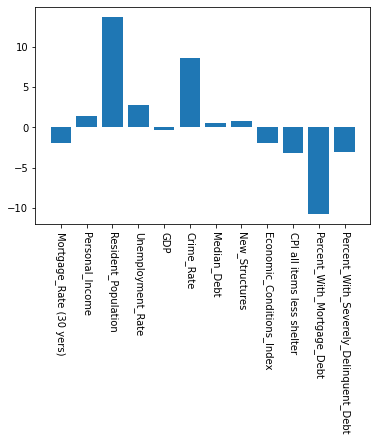

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,1/1/2017,169.46066,4.15,53870,7337.097,4.1,1699894.281,774.6436,35.30%,138819,1.40%,6054,4.08,221.248
1,2/1/2017,171.30343,4.17,56864,7455.756,4.1,505768.515,774.6436,35.30%,138819,1.40%,4914,3.98,225.753
2,3/1/2017,173.44678,4.20,56864,7455.756,3.9,505768.515,774.6436,35.30%,138819,1.40%,6397,3.93,225.753
3,4/1/2017,175.29404,4.05,56864,7455.756,3.5,505768.515,774.6436,35.10%,140633,1.20%,4205,3.69,225.753
4,5/1/2017,176.53401,4.01,56864,7455.756,3.6,505768.515,774.6436,35.10%,140633,1.20%,4995,3.77,225.753
5,6/1/2017,177.85815,3.90,56864,7455.756,3.9,505768.515,774.6436,35.10%,140633,1.20%,5659,3.94,225.753
6,7/1/2017,178.50937,3.97,56864,7455.756,3.9,505768.515,774.6436,34.70%,142486,1.20%,4250,3.76,225.753
7,8/1/2017,179.03170,3.88,56864,7455.756,3.9,505768.515,774.6436,34.70%,142486,1.20%,6620,3.91,225.753
8,9/1/2017,179.73311,3.81,56864,7455.756,3.5,505768.515,774.6436,34.70%,142486,1.20%,4446,4.15,225.753
9,10/1/2017,180.42716,3.90,56864,7455.756,3.3,505768.515,774.6436,34.50%,144208,1.40%,6459,4.03,225.753


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1/1/2017,169.46066,4.15,53870,7337.097,4.1,1699894.281,774.6436,138819,6054,4.08,221.248,35.3,1.4
1,2/1/2017,171.30343,4.17,56864,7455.756,4.1,505768.515,774.6436,138819,4914,3.98,225.753,35.3,1.4
2,3/1/2017,173.44678,4.20,56864,7455.756,3.9,505768.515,774.6436,138819,6397,3.93,225.753,35.3,1.4
3,4/1/2017,175.29404,4.05,56864,7455.756,3.5,505768.515,774.6436,140633,4205,3.69,225.753,35.1,1.2
4,5/1/2017,176.53401,4.01,56864,7455.756,3.6,505768.515,774.6436,140633,4995,3.77,225.753,35.1,1.2


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,4.15,53870,7337.097,4.1,1699894.281,774.6436,138819,6054,4.08,221.248,35.3,1.4
1,4.17,56864,7455.756,4.1,505768.515,774.6436,138819,4914,3.98,225.753,35.3,1.4
2,4.20,56864,7455.756,3.9,505768.515,774.6436,138819,6397,3.93,225.753,35.3,1.4
3,4.05,56864,7455.756,3.5,505768.515,774.6436,140633,4205,3.69,225.753,35.1,1.2
4,4.01,56864,7455.756,3.6,505768.515,774.6436,140633,4995,3.77,225.753,35.1,1.2
5,3.90,56864,7455.756,3.9,505768.515,774.6436,140633,5659,3.94,225.753,35.1,1.2
6,3.97,56864,7455.756,3.9,505768.515,774.6436,142486,4250,3.76,225.753,34.7,1.2
7,3.88,56864,7455.756,3.9,505768.515,774.6436,142486,6620,3.91,225.753,34.7,1.2
8,3.81,56864,7455.756,3.5,505768.515,774.6436,142486,4446,4.15,225.753,34.7,1.2
9,3.90,56864,7455.756,3.3,505768.515,774.6436,144208,6459,4.03,225.753,34.5,1.4


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,3.992500,0.125635,3.8100,3.9000,3.9600,4.0750,4.200000e+00
Personal_Income,12.0,56614.500000,864.293353,53870.0000,56864.0000,56864.0000,56864.0000,5.686400e+04
Resident_Population,12.0,7445.867750,34.253903,7337.0970,7455.7560,7455.7560,7455.7560,7.455756e+03
Unemployment_Rate,12.0,3.700000,0.298481,3.3000,3.4750,3.7500,3.9000,4.100000e+00
GDP,12.0,605278.995500,344714.416223,505768.5150,505768.5150,505768.5150,505768.5150,1.699894e+06
Crime_Rate,12.0,774.643600,0.000000,774.6436,774.6436,774.6436,774.6436,7.746436e+02
Median_Debt,12.0,141536.500000,2104.513397,138819.0000,140179.5000,141559.5000,142916.5000,1.442080e+05
New_Structures,12.0,5115.333333,1088.193025,3631.0000,4238.7500,4954.5000,6139.7500,6.620000e+03
Economic_Conditions_Index,12.0,3.875833,0.179112,3.5400,3.7525,3.9200,3.9925,4.150000e+00
CPI all items less shelter,12.0,225.377583,1.300481,221.2480,225.7530,225.7530,225.7530,2.257530e+02


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.649605,1.731427,1.761869,-1.039095,3.411554,-0.281193,1.803474,2.141316,0.369957,0.747578,-1.910548,-1.689780
1,-0.630636,2.372178,2.060688,-1.039095,0.091829,-0.281193,1.803474,1.273471,0.323863,1.234676,-1.910548,-1.689780
2,-0.602184,2.372178,2.060688,-1.170955,0.091829,-0.281193,1.803474,2.402430,0.300815,1.234676,-1.910548,-1.689780
3,-0.744447,2.372178,2.060688,-1.434675,0.091829,-0.281193,2.357950,0.733733,0.190189,1.234676,-1.980022,-1.906536
4,-0.782384,2.372178,2.060688,-1.368745,0.091829,-0.281193,2.357950,1.335134,0.227064,1.234676,-1.980022,-1.906536
5,-0.886711,2.372178,2.060688,-1.170955,0.091829,-0.281193,2.357950,1.840615,0.305425,1.234676,-1.980022,-1.906536
6,-0.820322,2.372178,2.060688,-1.170955,0.091829,-0.281193,2.924347,0.767990,0.222455,1.234676,-2.118971,-1.906536
7,-0.905680,2.372178,2.060688,-1.170955,0.091829,-0.281193,2.924347,2.572193,0.291596,1.234676,-2.118971,-1.906536
8,-0.972070,2.372178,2.060688,-1.434675,0.091829,-0.281193,2.924347,0.917198,0.402223,1.234676,-2.118971,-1.906536
9,-0.886711,2.372178,2.060688,-1.566535,0.091829,-0.281193,3.450703,2.449629,0.346910,1.234676,-2.188446,-1.689780


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[180.13875782 183.82480603 184.38488778 184.41593742 185.10307354
 186.12653732 187.04928987 188.58084986 186.37858723 187.5885737
 186.28530595 186.13467868]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,180.138758
1,183.824806
2,184.384888
3,184.415937
4,185.103074
5,186.126537
6,187.049290
7,188.580850
8,186.378587
9,187.588574
